In [1]:
import numpy as np
import os
from collections import Counter
import pandas as pd

In [2]:
mva_sgc =pd.read_fwf('mva_csg150_50pc_injscale.txt',index_col=0)
mva_sgc = mva_sgc.drop('170817')
mva_sgc = mva_sgc.drop('E264930')
mva_adi =pd.read_fwf('mva_adi-a_50pc_injscale.txt',index_col=0)
mva_adi = mva_adi.drop('170817')
mva_adi = mva_adi.drop('E264930')

In [3]:
x_sgc =pd.read_fwf('x_csg150_50pc_injscale.txt',index_col=0)
x_sgc = x_sgc.drop('E264930')
x_adi =pd.read_fwf('x_adi-a_50pc_injscale.txt',index_col=0)
x_adi = x_adi.drop('E264930')

In [4]:
plot_df = pd.concat([x_adi, mva_adi],axis=1)

In [5]:
plot = plot_df.plot(kind='bar',title="Injection 50% UL for adi-a")
plot.legend(bbox_to_anchor=(1.3, 1.3))
fig = plot.get_figure()

#fig.savefig(fd+"/"+args.page_name[0]+".png",bbox_inches='tight')

In [6]:
plot_df = pd.concat([x_sgc, mva_sgc],axis=1)

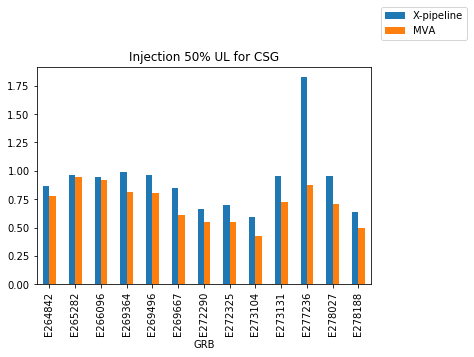

In [7]:
plot = plot_df.plot(kind='bar',title="Injection 50% UL for CSG")
plot.legend(bbox_to_anchor=(1.3, 1.3))
fig = plot.get_figure()

#fig.savefig(fd+"/"+args.page_name[0]+".png",bbox_inches='tight')

In [8]:
x_sgc.median(axis=0)

X-pipeline    0.945129
dtype: float64

In [9]:
mva_sgc.median(axis=0)

MVA    0.723649
dtype: float64

In [10]:
x_adi.median(axis=0)

X-pipeline    0.308376
dtype: float64

In [11]:
mva_adi.median(axis=0)

MVA    0.238171
dtype: float64

In [38]:
sgchrss =pd.read_fwf('csg_hrss90.txt',index_col=0)
sgchrss = sgchrss.drop('170817')
sgchrss = sgchrss.drop('E264930')
adia90 =pd.read_fwf('adi_a_injscale90.txt',index_col=0)
adia90 = adia90.drop('170817')
adia90 = adia90.drop('E264930')

In [39]:
import scipy.constants as const
from astropy.constants import M_sun

In [40]:
f0 = 150
c=const.c
pi=const.pi
E = 0.01*M_sun*c**2
G=const.G
A=5/2

In [41]:
dist = np.sqrt(A*E*G/(pi**2*c**3*f0**2*sgchrss**2))/3.086e+22

In [42]:
dist = np.sort([dist[i][0].value for i in range(len(dist))])

In [43]:
csg_dist = dist

In [44]:
adi_dist = np.array(20/adia90)

In [45]:
adi_dist = np.sort([adi_dist[i][0] for i in range(len(adi_dist))])

In [46]:
adi_dist

array([32.31096069, 38.05522574, 45.51402401, 46.87067911, 48.52790597,
       54.93071863, 65.45787786, 65.97785783, 66.4856042 , 76.42192545,
       85.76145451, 95.57305604, 97.01297063])

In [47]:
import matplotlib
import matplotlib.pyplot as plt

In [48]:
csg_dist

array([ 47.59303495,  52.33835832,  52.75246687,  56.84335099,
        73.52027991,  74.77974944,  76.98814457,  77.19361081,
        82.14114943, 108.29630939, 109.16804297, 112.83887208,
       117.79339311])

In [49]:
adi_dist

array([32.31096069, 38.05522574, 45.51402401, 46.87067911, 48.52790597,
       54.93071863, 65.45787786, 65.97785783, 66.4856042 , 76.42192545,
       85.76145451, 95.57305604, 97.01297063])

In [50]:
adi_dist = np.append(adi_dist,max(csg_dist)*5)
csg_dist = np.append(csg_dist,max(csg_dist)*5)
#sorted_nsbh_align_ex.append(max(sorted_nsbh_align_ex)*5)
hist_xlim=(adi_dist[0]/2.5, csg_dist[-2]*2.5)
#hist_xlim=(adi_dist[0]/2.5, sorted_nsbh_align_ex[-2]*2.5)

matplotlib.rcParams['text.usetex'] = True
matplotlib.rcParams['font.family'] = 'serif'
matplotlib.rcParams['font.serif'] = 'Computer Modern Roman'
matplotlib.rcParams['text.latex.preamble'] = [r'\usepackage{amsmath}']
matplotlib.rcParams.update({'font.size': 26})


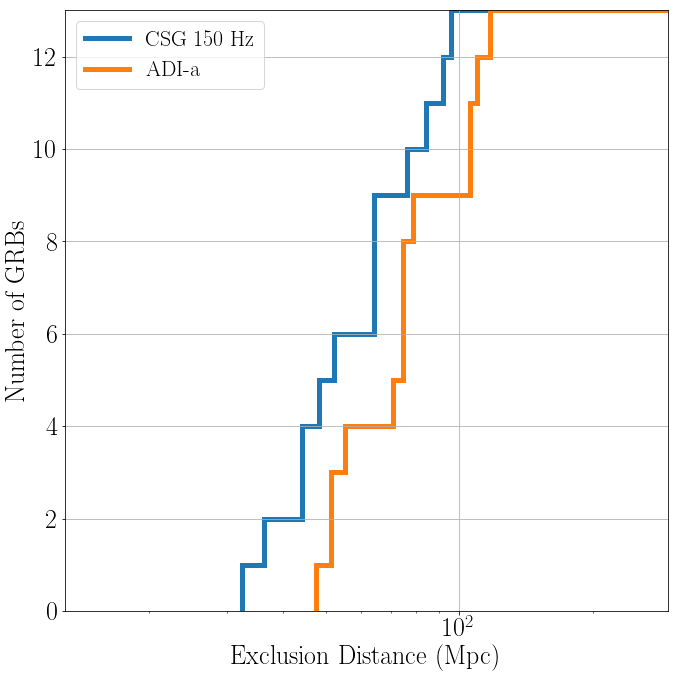

In [51]:

# Make plot
fig = plt.figure(figsize=(10,10))
ax = fig.gca()
ax.set_xscale('log')
ax.set_xlim(hist_xlim)
ax.set_ylim([0,len(csg_dist)-1])
ax.hist(adi_dist,bins=len(adi_dist)*10,label='CSG 150 Hz',linewidth=5.,cumulative=True,histtype='step')
ax.hist(csg_dist,bins=len(csg_dist)*10,label='ADI-a',linewidth=5.,cumulative=True,histtype='step')

# Make legend lines not box
handles, labels = ax.get_legend_handles_labels()
new_handles = [matplotlib.lines.Line2D([], [], c=h.get_edgecolor(),
                                       linewidth=5.) for h in handles]
ax.legend(handles=new_handles, labels=labels, loc='upper left', fontsize=22)

#plt.legend(loc='best')
ax.set_xlabel('Exclusion Distance (Mpc)')
ax.set_ylabel('Number of GRBs')
ax.grid()
plt.tight_layout()
